         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  -

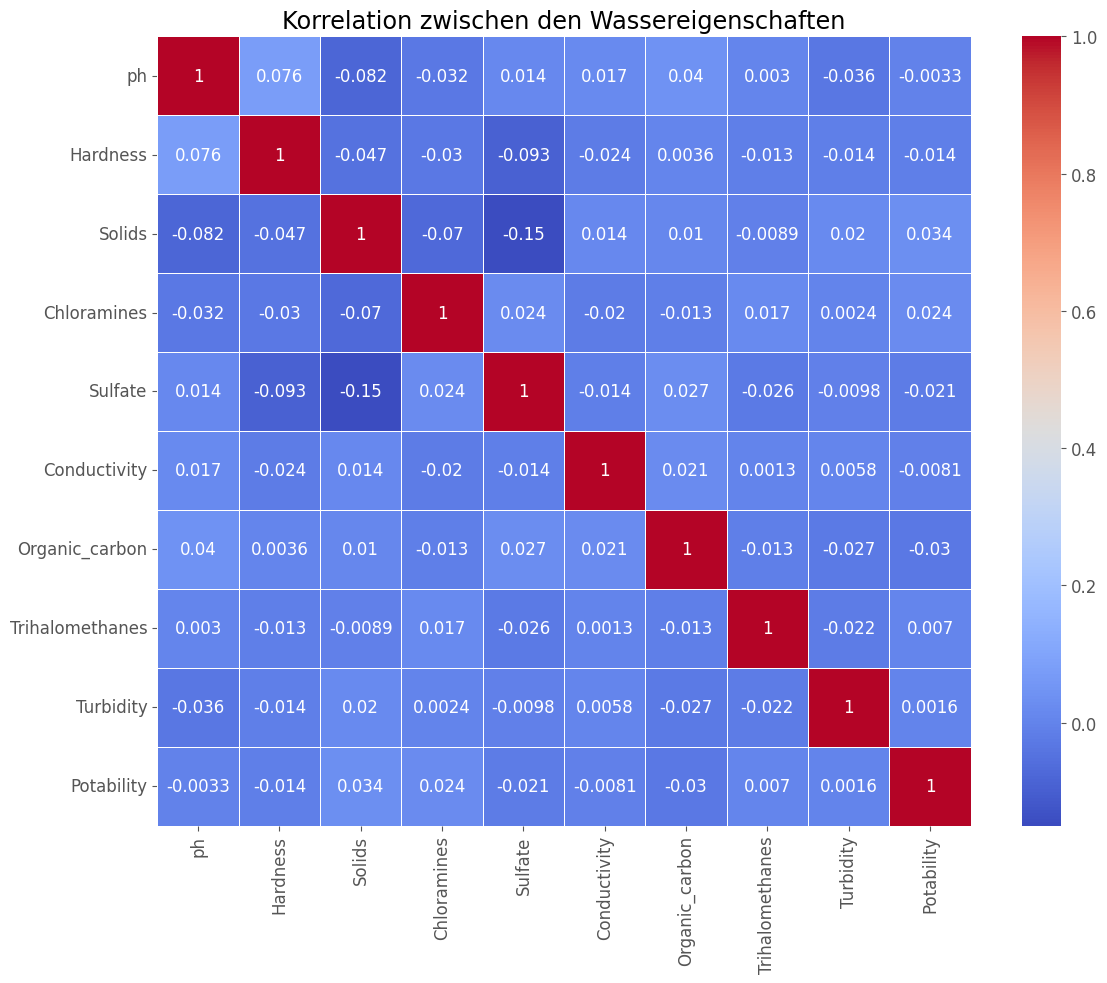

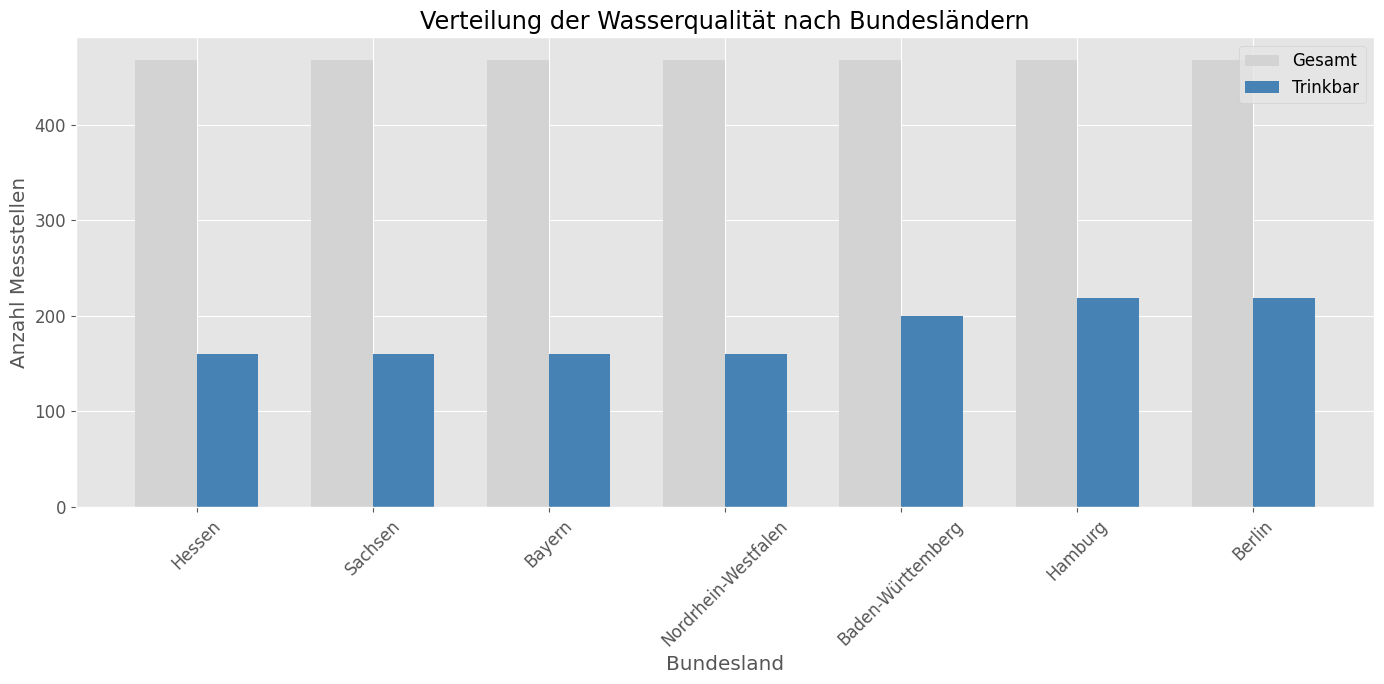

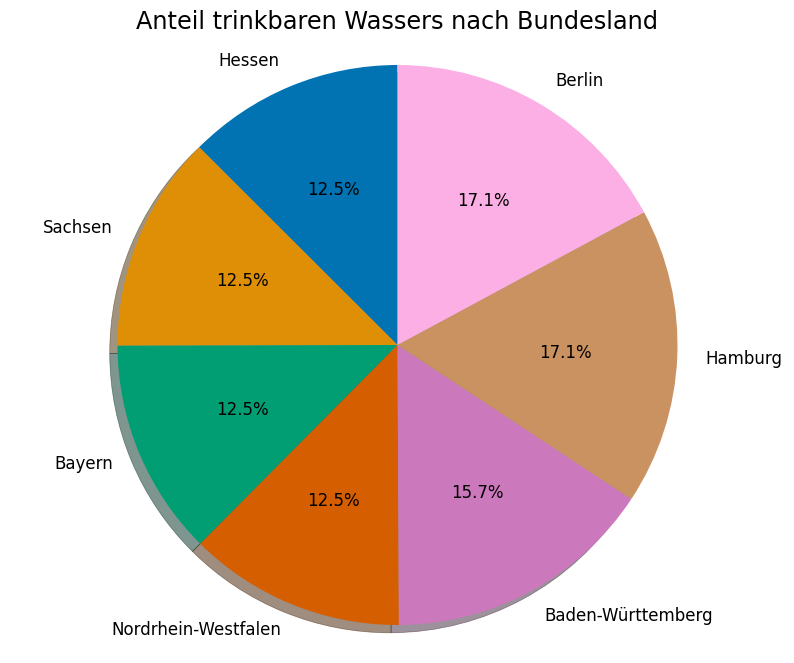

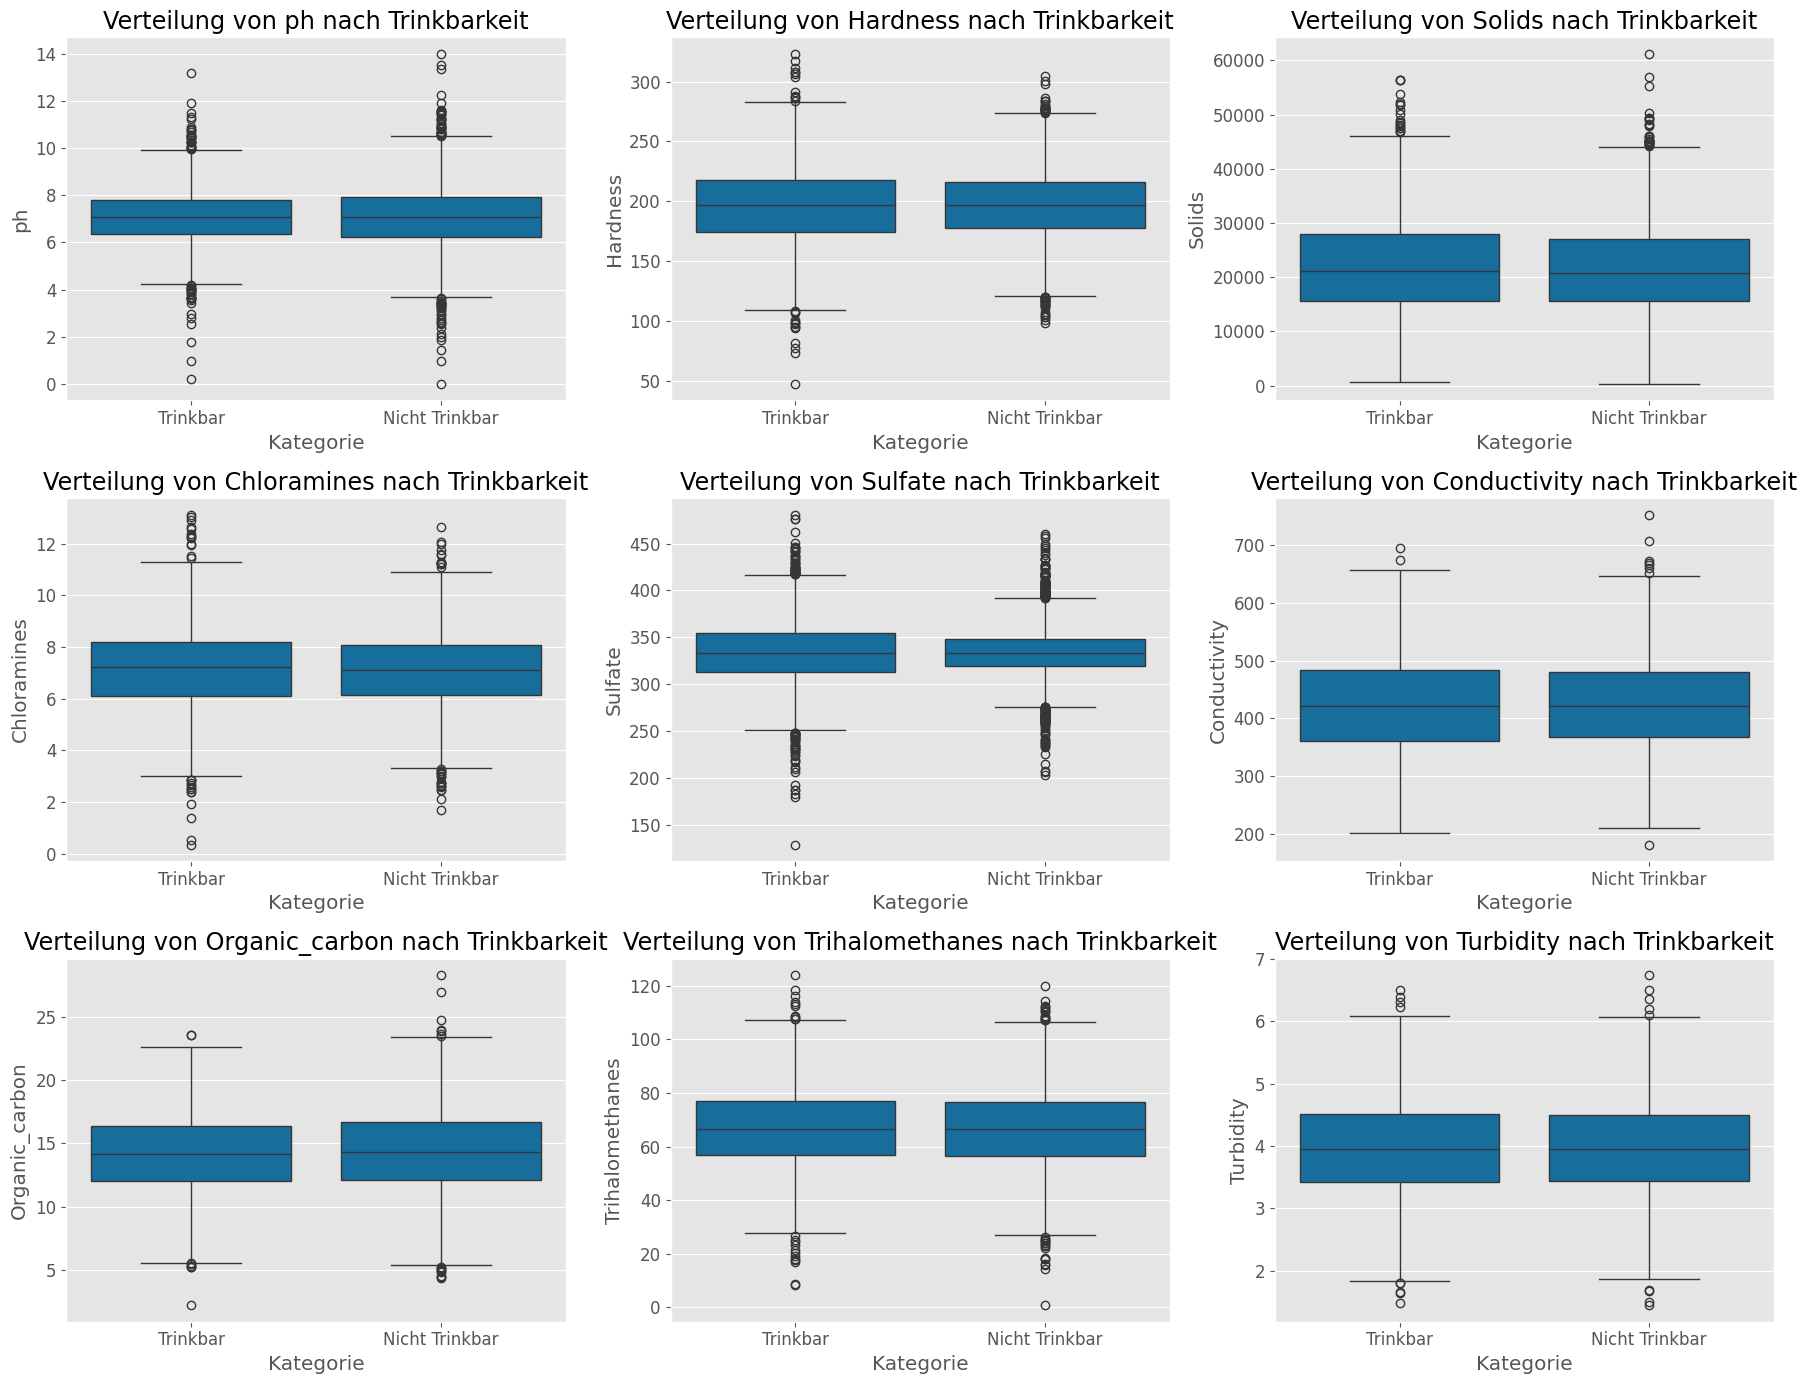

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Einstellungen für bessere Visualisierungen
plt.style.use('ggplot')  # Verwende einen verfügbaren Stil
sns.set_palette('colorblind')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# Daten laden
water = pd.read_csv(r'C:\\Users\\Administrator\\Documents\\Kursmaterial\\Selbs_übung\\Github_wasserpotabilitaets\\wasserpotabilitaet\\data\\water_potability.csv')
print(water.head())

# Informationen über den Datensatz anzeigen
print(water.info())

# Statistische Zusammenfassung
print(water.describe())

# Überprüfen auf fehlende Werte
missing_values = water.isnull().sum()
print(f"Fehlende Werte pro Spalte:\n{missing_values}")

# Prozentsatz der fehlenden Werte
print(f"\nProzentsatz der fehlenden Werte pro Spalte:")
print((missing_values / len(water) * 100).round(2))

# Fehlende Werte mit dem Mittelwert ersetzen
water = water.fillna(water.mean())

# Überprüfen, ob alle fehlenden Werte ersetzt wurden
print(f"Verbleibende fehlende Werte: {water.isnull().sum().sum()}")

# Messstellen-IDs erstellen
anzahl_messstellen = len(water)
indizes = [f'M{i+1}' for i in range(anzahl_messstellen)]
water.index = indizes

# Bundesländer definieren
bundeslaender = ['Hessen', 'Sachsen', 'Bayern', 'Nordrhein-Westfalen',
                 'Baden-Württemberg', 'Hamburg', 'Berlin']

# Zufallszahlen erstellen
np.random.seed(42)  # Für Reproduzierbarkeit
zufallszahlen = np.random.choice(range(1, anzahl_messstellen + 1),
                                  size=anzahl_messstellen, replace=False)

# In 7 Gruppen aufteilen
gruppen = np.array_split(zufallszahlen, 7)

# Bundesländer zuweisen
laender = []
for i in range(7):
    laender.extend([bundeslaender[i]] * len(gruppen[i]))

# Zum DataFrame hinzufügen
water['Bundesland'] = laender

# Verteilung anzeigen
bundesland_verteilung = water['Bundesland'].value_counts()
print("Verteilung der Messstellen nach Bundesländern:")
print(bundesland_verteilung)

# Aufteilen in trinkbar und nicht-trinkbar
df_trinkbar = water.loc[water['Potability'] == 1]
df_nicht_trinkbar = water.loc[water['Potability'] == 0]

print(f"Trinkbares Wasser: {len(df_trinkbar)} Messstellen ({len(df_trinkbar)/len(water)*100:.1f}%)")
print(f"Nicht-trinkbares Wasser: {len(df_nicht_trinkbar)} Messstellen ({len(df_nicht_trinkbar)/len(water)*100:.1f}%)")

# Zählen der Messstellen pro Bundesland (trinkbar)
trinkbar_pro_bundesland = df_trinkbar['Bundesland'].value_counts()

# Gesamtzahl der Messstellen pro Bundesland
gesamt_pro_bundesland = water['Bundesland'].value_counts()

# Anteil berechnen
anteil_pro_bundesland = (trinkbar_pro_bundesland / gesamt_pro_bundesland * 100).round(2)

# Bundesland mit dem höchsten Anteil an trinkbarem Wasser
bestes_bundesland = anteil_pro_bundesland.idxmax()
bester_anteil = anteil_pro_bundesland.max()

print(f"Bundesland mit dem höchsten Anteil trinkbaren Wassers: {bestes_bundesland} ({bester_anteil}%)")

# Ergebnisse in DataFrame für bessere Übersicht
ergebnisse = pd.DataFrame({
    'Bundesland': gesamt_pro_bundesland.index,
    'Messstellen_Gesamt': gesamt_pro_bundesland.values,
    'Messstellen_Trinkbar': trinkbar_pro_bundesland.reindex(gesamt_pro_bundesland.index).fillna(0).values,
    'Anteil_Trinkbar_Prozent': anteil_pro_bundesland.reindex(gesamt_pro_bundesland.index).fillna(0).values
})

# Statistiken für trinkbares Wasser
print("Wertebereiche für Trinkbares Wasser:")
stats_trinkbar = df_trinkbar.describe()
print(stats_trinkbar)

# Statistiken für nicht-trinkbares Wasser
print("Wertebereiche für Nicht-Trinkbares Wasser:")
stats_nicht_trinkbar = df_nicht_trinkbar.describe()
print(stats_nicht_trinkbar)

# Korrelationen zwischen den Eigenschaften berechnen
daten_fuer_korrelation = water.drop(columns=['Bundesland'])
korrelation = daten_fuer_korrelation.corr()

# Korrelationsmatrix visualisieren
plt.figure(figsize=(12, 10))
sns.heatmap(korrelation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Korrelation zwischen den Wassereigenschaften')
plt.tight_layout()

# Balkendiagramm: Vergleich der Bundesländer
plt.figure(figsize=(14, 7))
bar_width = 0.35
index = np.arange(len(ergebnisse))

plt.bar(index, ergebnisse['Messstellen_Gesamt'], bar_width,
        label='Gesamt', color='lightgray')
plt.bar(index + bar_width, ergebnisse['Messstellen_Trinkbar'], bar_width,
        label='Trinkbar', color='steelblue')

plt.xlabel('Bundesland')
plt.ylabel('Anzahl Messstellen')
plt.title('Verteilung der Wasserqualität nach Bundesländern')
plt.xticks(index + bar_width / 2, ergebnisse['Bundesland'], rotation=45)
plt.legend()
plt.tight_layout()

# Kreisdiagramm: Anteil trinkbaren Wassers nach Bundesland
plt.figure(figsize=(10, 8))
plt.pie(ergebnisse['Anteil_Trinkbar_Prozent'],
        labels=ergebnisse['Bundesland'],
        autopct='%1.1f%%',
        startangle=90,
        shadow=True)
plt.axis('equal')
plt.title('Anteil trinkbaren Wassers nach Bundesland')

# Boxplots für verschiedene Eigenschaften nach Trinkbarkeit
eigenschaften = [col for col in water.columns if col not in ['Potability', 'Bundesland']]

fig, axes = plt.subplots(3, 3, figsize=(18, 14))
axes = axes.flatten()

for i, eigenschaft in enumerate(eigenschaften):
    if i < len(axes):
        # Erstellen eines neuen DataFrames für das Plotting
        plot_data = pd.DataFrame({
            'Wert': pd.concat([df_trinkbar[eigenschaft], df_nicht_trinkbar[eigenschaft]]),
            'Kategorie': ['Trinkbar'] * len(df_trinkbar) + ['Nicht Trinkbar'] * len(df_nicht_trinkbar)
        })

        # Boxplot erstellen
        sns.boxplot(x='Kategorie', y='Wert', data=plot_data, ax=axes[i])
        axes[i].set_title(f'Verteilung von {eigenschaft} nach Trinkbarkeit')
        axes[i].set_ylabel(eigenschaft)

plt.tight_layout()
plt.show()
